# Explore Sentinel-5P products with openEO

Sentinel-5P is the first Copernicus mission to monitor the atmosphere and global air quality. It conducts precise atmospheric measurements to support air quality assessments, ozone and UV radiation monitoring, as well as climate forecasting.

For those interested in Sentinel-5P offerings, openEO provides a convenient means to retrieve these products without the hassle of dealing with file locations or downloading entire collections. Users can effortlessly access the products relevant to their specified area and timeframe with the openEO API. Moreover, users can conduct analyses on these products through built-in processes.

Thus, within this notebook, we illustrate the application of openEO for accessing Sentinel-5P products for comprehensive analysis. While we won't delve into detailed analyses and possibilities in this notebook, we aim to demonstrate the fundamental tasks that users interested in atmospheric monitoring can perform using openEO.

Reference:
* https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-5p
* https://www.sciencedirect.com/science/article/pii/S1352231097004457

In [1]:
import openeo

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# authenticate your account
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


Let's have a quick understanding of the available `SENTINEL_5P_L2` accessed through openEO in the Copernicus Data Space Ecosystem.

In [3]:
connection.describe_collection("SENTINEL_5P_L2")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['CO',
    'HCHO',
    'NO2',
    'O3',
    'SO2',
    'CH4',
    'AER_AI_340_380',
    'AER_AI_354_388',
    'CLOUD_BASE_PRESSURE',
    'CLOUD_TOP_PRESSURE',
    'CLOUD_BASE_HEIGHT',
    'CLOUD_TOP_HEIGHT',
    'CLOUD_OPTICAL_THICKNESS',
    'CLOUD_FRACTION',
    'dataMask']},
  't': {'extent': ['2018-04-30T00:18:50Z', None],
   'step': 'P1D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-85, 85],
   'reference_system': 4326,
   'type': 'spatial'}},
 'description': 'Sentinel 5 Precursor imagery captured by TROPOMI sensor.\n\nThis dataset only supports loading one band at a time.',
 'extent': {'spatial': {'bbox': [[-180.0, -85.0, 180.0, 85.0]]},
  'temporal': {'interval': [['2018-04-30T00:18:50Z', None]]}},
 'id': 'SENTINEL_5P_L2',
 'license': 'proprietary',
 'links': [{'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/',
   'rel': 'root',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2',
   'rel': 'self',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections',
   'rel': 'parent',
   'type': 'application/json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/queryables',
   'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'type': 'application/schema+json'},
  {'href': 'https://sh.dataspace.copernicus.eu/api/v1/catalog/1.0.0/collections/sentinel-5p-l2/items',
   'rel': 'items',
   'type': 'application/geo+json'}],
 'providers': [],
 'sci:citation': 'Modified Copernicus Sentinel data [Year]/Sentinel Hub',
 'stac_extensions': ['https://stac-extensions.github.io/scientific/v1.0.0/schema.json',
  'https://stac-extensions.github.io/sat/v1.0.0/schema.json',
  'https://docs.sentinel-hub.com/api/latest/stac/s5p/v1.0.0/schema.json'],
 'stac_version': '1.0.0',
 'summaries': {'eo:bands': [{'data_type': 'float32',
    'description': 'Carbon monoxide',
    'name': 'CO',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.1], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Formaldehyde',
    'name': 'HCHO',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.001], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Nitrogen oxide',
    'name': 'NO2',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.0003], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Ozone',
    'name': 'O3',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.36], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Sulphur dioxide',
    'name': 'SO2',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [0.01], 'minimum': [0]}},
   {'data_type': 'float32',
    'description': 'Methane',
    'name': 'CH4',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [2000], 'minimum': [1600]}},
   {'data_type': 'float32',
    'description': 'UV (Ultraviolet) Aerosol Index calculated based on wavelengths of 340 nm and 380 nm',
    'name': 'AER_AI_340_380',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
    'statistics': {'maximum': [5], 'minimum': [-1]}},
   {'data_type': 'float32',
    'description': 'UV (Ultraviolet) Aerosol Index calculated based on wavelengths of 354 nm and 388 nm',
    'name': 'AER_AI_354_388',
    'openeo:gsd': {'unit': '°',
     'value': [0.054563492063483, 0.034722222222216]},
   

In this scenario, we've selected a bounding box covering Belgium for 2020. We chose Belgium purely out of interest, but users can pick any geographical area or time frame they desire for their analysis.

In [4]:
# define area and time of interest
extent = {"west":2.146728, "south": 49.446978, "east": 6.497314, "north": 51.651837}
time = ["2020-01-01", "2021-01-01"]

Next, we create a function called `fetch_collection` to retrieve a list of datacubes. Each datacube in the list represents an individual air quality product from the Sentinel-5P L2 dataset. These datacubes are then combined using the `merge_cubes` process to generate a single cube containing all these products as a separate layer.

Please note that users can only load one product at a time, even if provided within the same Sentinel 5P collection.

In [5]:
def fetch_collection(bands, time, extent) -> list:
    cubes = []
    
    for band in bands:
        datacube = connection.load_collection(
            "SENTINEL_5P_L2",
            temporal_extent=time,
            spatial_extent=extent,
            bands=[band]
        )
        cubes.append(datacube)

    return cubes

In [6]:
band=["AER_AI_340_380", "AER_AI_354_388", "CO", "HCHO", "NO2", "O3", "SO2", "CH4"]

cubes = fetch_collection(band,time,extent)
merged_cube = cubes[0]
for cube in cubes[1:]:
    merged_cube = merged_cube.merge_cubes(cube)

As an additional step in this workflow, we apply the [`aggregate_temporal_period`](https://open-eo.github.io/openeo-python-client/api-processes.html#openeo.processes.aggregate_temporal_period) process available in openEO, which combines data over a specified time period. In this case, we have set the period to *dekad*, meaning a 10-day period.

In [7]:
simplified_cube = merged_cube.aggregate_temporal_period(reducer="mean", period="dekad")

Since the workflow covers an entire year with eight different bands over Belgium, we assume that the processing might be computationally intensive. Therefore, we should leverage the job configuration capabilities provided in openEO to execute the workflow using batch job-based methods.

In [8]:
job_options = {
        "executor-memory": "3G",
        "executor-memoryOverhead": "4G",
        "executor-cores": "2"
}

In [13]:
# execute the process
simplified_cube.execute_batch(title="Sentinel-5P Belgium",outputfile="Sentinel5P_Belgium.nc", job_options=job_options)

### Now, let's analyse the output. 

In [2]:
#load the saved file
dataset = xr.load_dataset("Sentinel5P_Belgium.nc")

Let us create a map showing the average values of each variable across time. These maps can provide insights into how the variables behave within the specified area of interest.

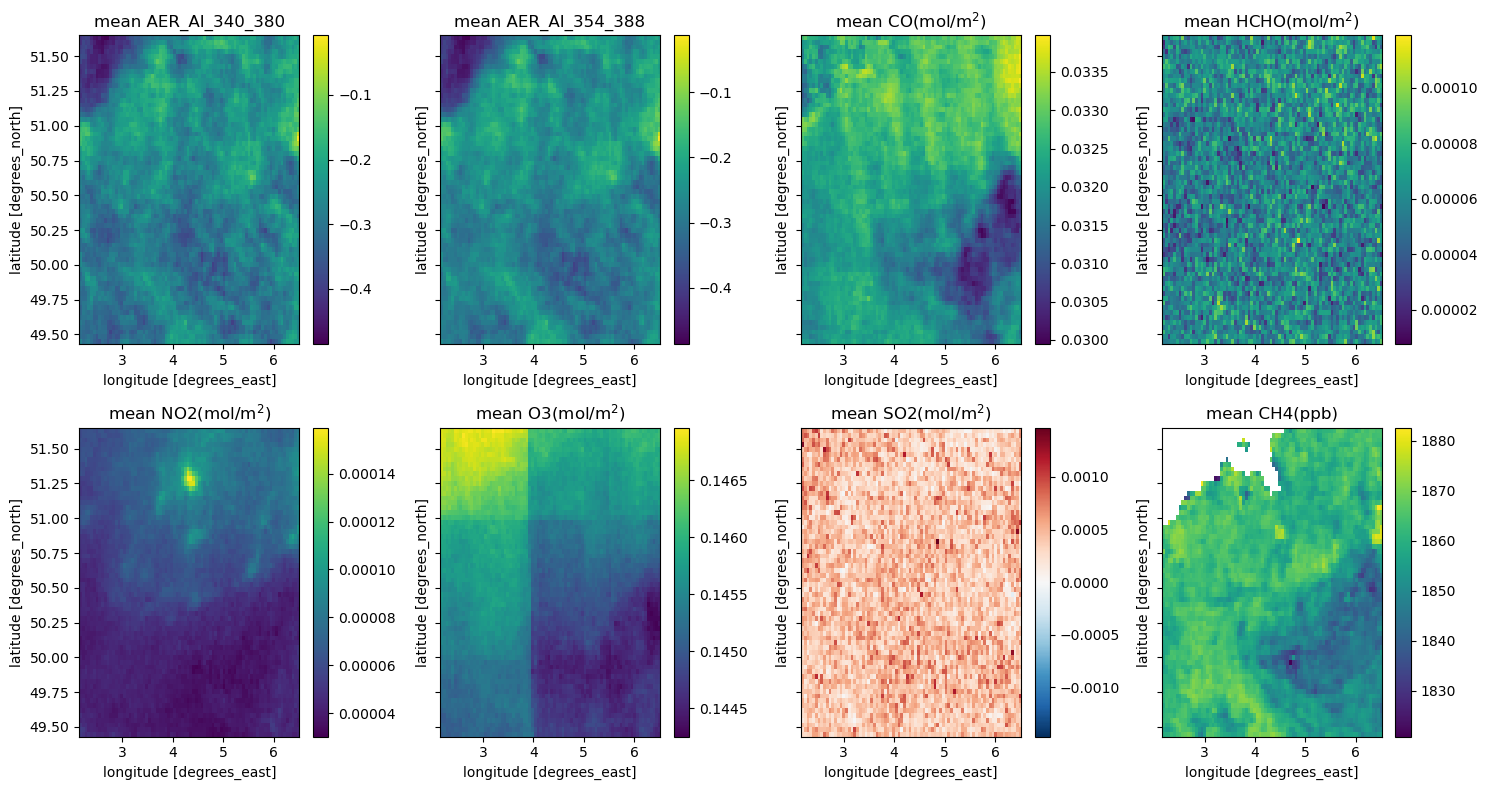

In [8]:
band=["AER_AI_340_380", "AER_AI_354_388", "CO", "HCHO", "NO2", "O3", "SO2", "CH4"]
units = ["", "", "(mol/m$^{2}$)", "(mol/m$^{2}$)", "(mol/m$^{2}$)", "(mol/m$^{2}$)", "(mol/m$^{2}$)", "(ppb)"]
nrows = 2
ncols = 4

fig, axes = plt.subplots(2,4, figsize=(15, 8), dpi=100, sharey=True)

for idx, (i, u) in enumerate(zip(band, units)):
    row = idx // ncols
    col = idx % ncols
    
    ds = dataset[[i]].to_array(dim="bands")
    ds.mean(dim="t")[0].plot.imshow(ax=axes[row, col])
    axes[row, col].set_title("mean " + i  + u )

plt.tight_layout()
plt.show()


Additionally, to understand the trend of these variables over time, let us calculate the mean of the images and analyze it for selected timestamps by plotting the variables across time intervals.

In [10]:
#calculate mean
dataset_mean = dataset[band].mean(dim=['x','y'])

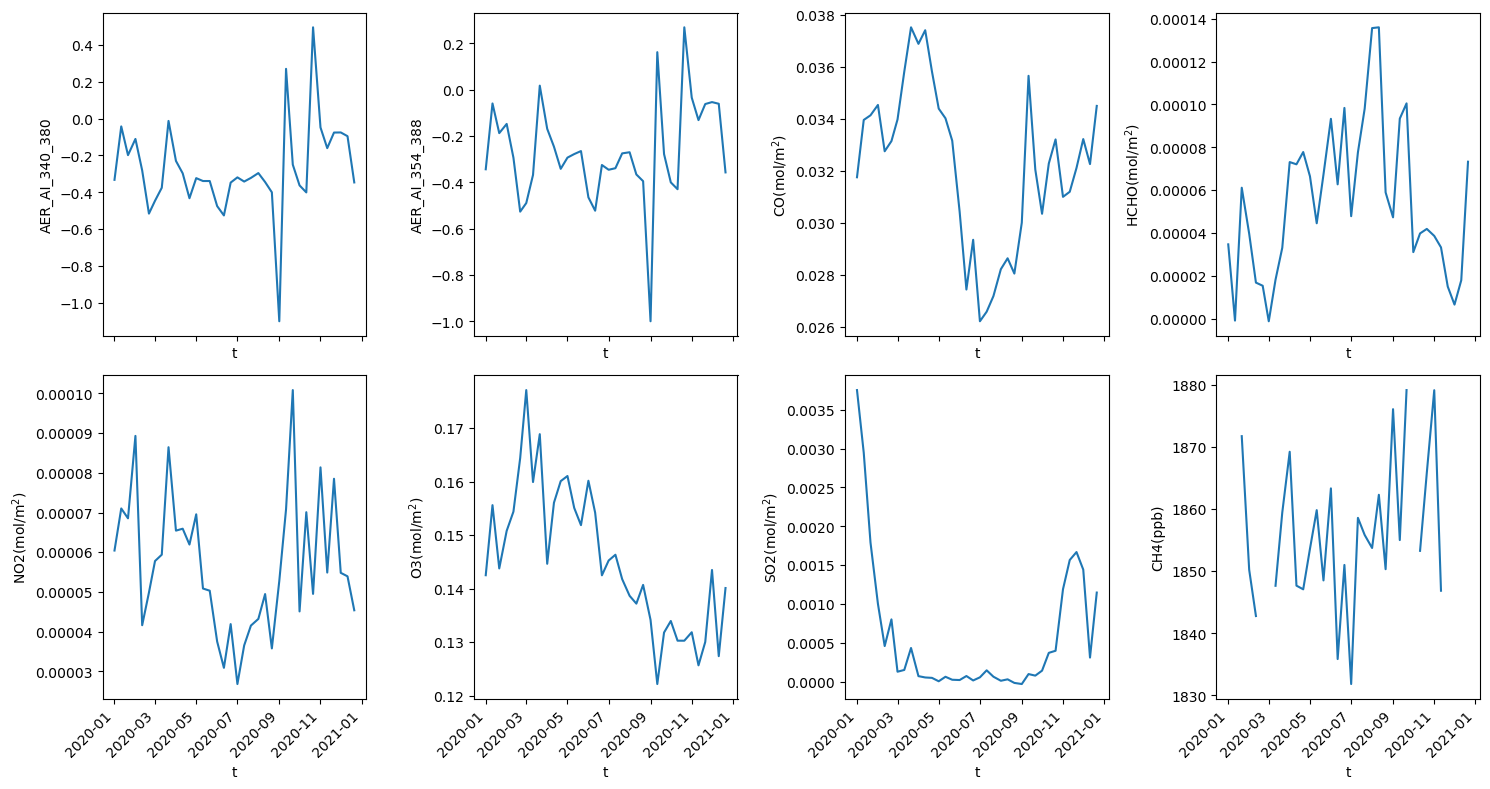

In [13]:
nrows = 2
ncols = 4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8), dpi=100, sharex=True)

for idx, (i, unit) in enumerate(zip(band, units)):
    row = idx // ncols
    col = idx % ncols
    xr.plot.line(dataset_mean[i], ax=axs[row][col]) 
    axs[row][col].tick_params(axis='x', labelrotation=45)
    axs[row][col].set_ylabel(i + unit )

plt.tight_layout()
plt.show()

From the plot above, we can observe the air quality trends of Belgium for the year 2020. There is a noticeable increase in CO and NO2 levels at the beginning of the year, followed by a decrease during the lockdown months from May to September. Conversely, there is a decreasing trend in O3 concentration, and a similar pattern is observed for SO2 levels.

Given that these variables are present in the atmosphere, it's reasonable to assume there could be some correlation among them. An overview of the correlation could help in future research and workflows.

In [19]:
# generate pandas dataframe
df = dataset.to_dataframe()

#correlation matrix
corr = df[band].corr()

# mask the same comparison twice for better visualisation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1') 
 .format(precision=2))

,AER_AI_340_380,AER_AI_354_388,CO,HCHO,NO2,O3,SO2,CH4
AER_AI_340_380,nan,nan,nan,nan,nan,nan,nan,nan
AER_AI_354_388,0.98,nan,nan,nan,nan,nan,nan,nan
CO,0.26,0.30,nan,nan,nan,nan,nan,nan
HCHO,-0.00,0.00,-0.12,nan,nan,nan,nan,nan
NO2,0.20,0.22,0.38,-0.01,nan,nan,nan,nan
O3,-0.24,-0.22,0.29,-0.11,-0.02,nan,nan,nan
SO2,0.15,0.15,0.08,-0.11,0.11,-0.05,nan,nan
CH4,0.11,0.14,-0.02,-0.00,0.36,-0.30,0.12,nan


As observed in the plot above, no significant or strong correlation exists between products except the two air quality indexes. However, a slight positive correlation exists between CH4, CO, and NO2. 

Please note that this correlation coefficient is calculated independently for a specific region, and no spatio-temporal or seasonal factors are considered in this analysis. This example illustrates potential correlations, and users can use any correlation matrix generation tool they prefer.